<a href="https://colab.research.google.com/github/sukhadak11/Machine_Learing/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np


Linear Regression:

Y = wX + b

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias


Gradient Descent:

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw

b = b - α*db

Linear Regression

In [15]:
class Linear_Regression():

   def __init__( self, learning_rate, no_of_iterations ) :

        self.learning_rate = learning_rate

        self.no_of_iterations = no_of_iterations

    # fit function to train the model

   def fit( self, X, Y ) :

        # no_of_training_examples, no_of_features

        self.m, self.n = X.shape

        # initiating the weight and bias

        self.w = np.zeros( self.n )

        self.b = 0

        self.X = X

        self.Y = Y


        # implementing Gradient Descent for Optimization

        for i in range( self.no_of_iterations ) :

            self.update_weights()



    # function to update weights in gradient descent

   def update_weights( self ) :

        Y_prediction = self.predict( self.X )

        # calculate gradients

        dw = - ( 2 * ( self.X.T ).dot( self.Y - Y_prediction )  ) / self.m

        db = - 2 * np.sum( self.Y - Y_prediction ) / self.m

        # updating the weights

        self.w = self.w - self.learning_rate * dw

        self.b = self.b - self.learning_rate * db


    # Line function for prediction:

   def predict( self, X ) :

        return X.dot( self.w ) + self.b


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [4]:
# data pre-processing loding data from csv file to pandas dataframe
salary_data = pd.read_csv('salary_data.csv')

In [5]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [7]:
salary_data.shape

(30, 2)

In [9]:
# checking for missing values
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Splitting the feature & target


In [11]:
x = salary_data.iloc[:,:-1].values
y = salary_data.iloc[:,1].values


In [12]:
print(x)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [13]:
print(y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


Splitting dataset into training & test data

In [14]:
x_train, x_test , y_train, y_test = train_test_split(x, y, test_size=0.33, random_state= 2)

training a linear reg

In [22]:
model = Linear_Regression(learning_rate = 0.02, no_of_iterations=2000)

In [23]:
model.fit(x_train, y_train)

In [24]:
# printing the parameter values ( weights & bias)

print('weight = ', model.w[0])
print('bias = ', model.b)

weight =  9512.94567802552
bias =  23707.80831200335


 y = 9514(x) + 23697


salary = 9514(experience) + 23697

Predict the salary value for test data

In [25]:
test_data_prediction = model.predict(x_test)
print(test_data_prediction)

[ 36074.63769344  34172.04855783  66516.06386312  58905.7073207
  91249.72262598  80785.48238016 101713.96287181  52246.64534608
  42733.69966805  88395.83892258]


visualizing predicted values and actual values

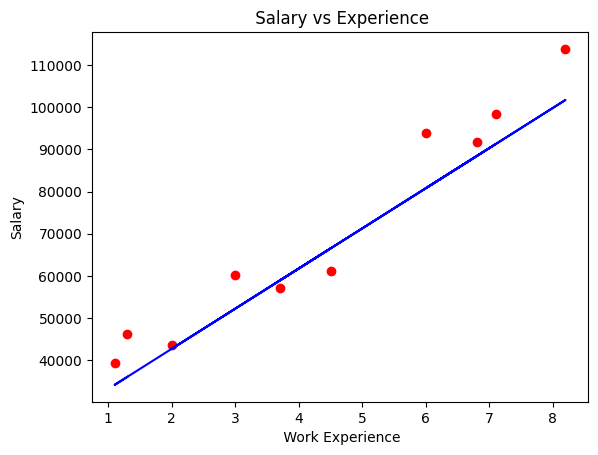

In [26]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, test_data_prediction, color='blue')
plt.xlabel(' Work Experience')
plt.ylabel('Salary')
plt.title(' Salary vs Experience')
plt.show()